In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Circle
import random

1.051


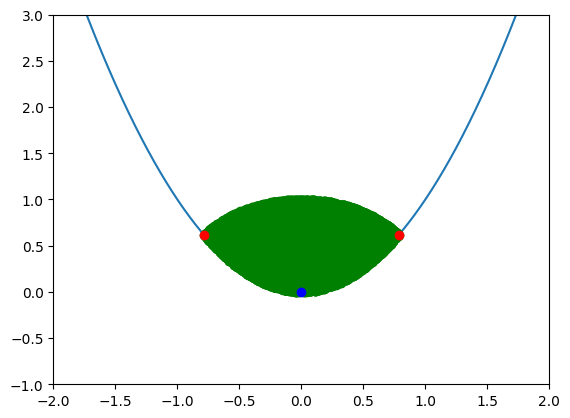

In [2]:
def parabola(a, x):
    return a*(x**2)

def MonteCarlo(N, a):
    inside = 0
    inside_x = []
    inside_y = []
    for i in range(N):
        x = 2*random.random() - 1
        y = 2*random.random() - 1
        
        if y > parabola(a,x) and x**2 + y**2 < 1:

            inside += 1
            inside_x.append(x)
            inside_y.append(y)
    
    area = 4*inside/N
    return area, inside_x, inside_y
            

def distance_from_point(x, y):
    return np.sqrt((x**2) + (y**2))

def limits(x, dist):
    circle_points_x = []
    circle_points_y = []
    for i in range(len(x)):
        distance = dist[i]
        if distance < 1:
            circle_points_x.append(x[i])
            circle_points_y.append(y[i])

    return circle_points_x, circle_points_y
    

x = np.linspace(-3, 3, num=1000)
y = parabola(1,x)

dist = distance_from_point(x,y)


circle_points_x, circle_points_y = limits(x, dist)


x_min = circle_points_x[0]
x_max =  circle_points_x[-1]
area, inside_x, inside_y = MonteCarlo(int(1e5), 1)
print(area)


plt.plot(x, parabola(1,x))
plt.plot(circle_points_x, circle_points_y)
plt.plot(inside_x, inside_y, 'go')

plt.plot(circle_points_x[0], circle_points_y[0], 'ro')
plt.plot(circle_points_x[-1], circle_points_y[-1], 'ro')
plt.plot(0,0, 'bo')
# plt.plot(Circle((0, 0), radius=1))
plt.xlim(-2,2)
plt.ylim(-1,3)
plt.show()


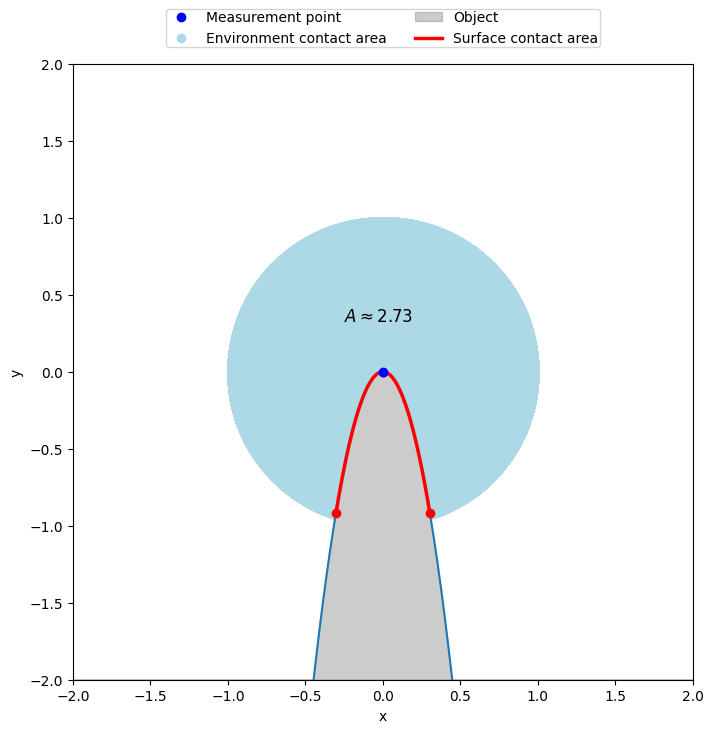

Environment contact area =  2.729774


In [35]:
def calculate_curvature(a, x):
    
    def func(x):
        y = a*(x**2)
        return y

    def first_derivative(func, x, h=1e-5):
        return (func(x + h) - func(x)) / h

    def second_derivative(func, x, h=1e-5):
        return (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

    def curvature(func, x):
        first_deriv = first_derivative(func, x)
        second_deriv = second_derivative(func, x)

        numerator = abs(second_deriv)
        denominator = (1 + first_deriv**2)**(3/2)

        return numerator / denominator
    
    if a <= 0: 
        curvature_value = curvature(func, x)
    else:
        curvature_value = -curvature(func, x)

    return curvature_value



def calculate_area(a, x, plot=False):

    y = parabola(a,x)

    dist = distance_from_point(x,y)

    circle_points_x = []
    circle_points_y = []

    for i in range(len(x)):
        if dist[i] <= 1:
            circle_points_x.append(x[i])
            circle_points_y.append(y[i])


    x_min = circle_points_x[0]
    x_max =  circle_points_x[-1]
    area, inside_x, inside_y = MonteCarlo(int(1e7), a)

    if plot:
        plt.figure(figsize=(8,8))
        plt.plot(0,0, 'bo', label='Measurement point')
#         if a == 0:
#             plt.title(r'Environment contact area of flat surface, with $y = a = %i$'%(a))
            
#         else:
#             plt.title(r'Environment contact area of the parabola peak of $y = ax^{2}$ with $a = %i$'%(a))
        plt.plot(inside_x, inside_y, 'o', color='lightblue', markersize=0.5)
        plt.plot(0, 0.5, 'o', color='lightblue', label='Environment contact area')
        
        if a == 0:
            plt.plot(x, parabola(a,x), label=r'$y = %i$'%(a))
#             plt.plot(x, parabola(a,x))


        else:
            plt.plot(x, parabola(a,x), label=r'$y = %i x^{2}$'%(a))
#             plt.plot(x, parabola(a,x))

        
        
#         plt.text(-1.8, 1.7, 'Area ≈ %.2f'%(area),
#         bbox={'facecolor': 'lightblue', 'alpha': 0.7, 'pad': 8})

        if a <= 0:
            plt.text(-0.25, 0.33, r'$A \approx %.2f$'%(area), fontsize=12)
            plt.fill_between(x, parabola(a,x), -2, color='grey', alpha=0.4, label='Object')

        else:
            plt.text(-0.25, 0.5, r'$A \approx %.2f$'%(area), fontsize=12)
            plt.fill_between(x, parabola(a,x), -3, color='grey', alpha=0.4, label='Object')

            plt.ylim(-1,3)

        
        plt.plot(circle_points_x[0], circle_points_y[0], 'ro', markersize=6)
        plt.plot(circle_points_x[-1], circle_points_y[-1], 'ro', markersize=6)
        plt.plot(circle_points_x, circle_points_y, 'r-', linewidth=2.5, label='Surface contact area')
        # plt.plot(Circle((0, 0), radius=1))
        
        plt.plot(0,0, 'bo')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(-2,2)
        plt.ylim(-2,2)
#         plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize='medium', borderpad=0.1, labelspacing=0.5)

        
#         plt.savefig(f'../../Figures/results/report visualizations/parabola_peak_contact_a={a}.png', dpi=300)

        plt.show()
        
        print("Environment contact area = ", area)
        return
            
    return area


x = np.linspace(-3, 3, num=1000)

# calculate_area(-5000, x, True)
# calculate_area(-10, x, True)


calculate_area(-3, x, True)
calculate_area(0, x, True)
calculate_area(3, x, True)

# calculate_area(10, x, True)

# calculate_area(2000, x, True)



In [170]:
a_values = np.linspace(-20,20, num=150)

area_values = []
curvature_values = []

for a in a_values:
    area = calculate_area(a,x)
    area_values.append(area)
    
    curvature = calculate_curvature(a,0)
    curvature_values.append(curvature)


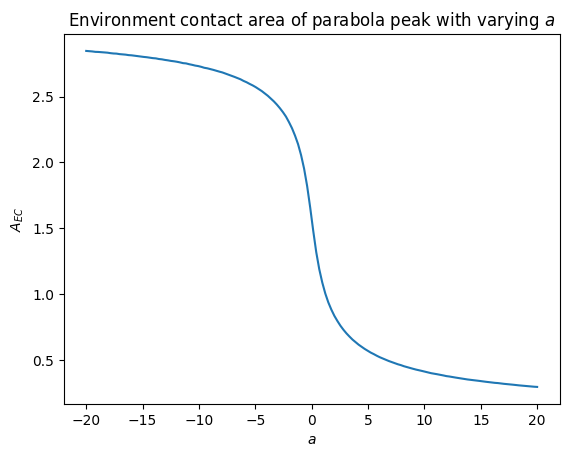

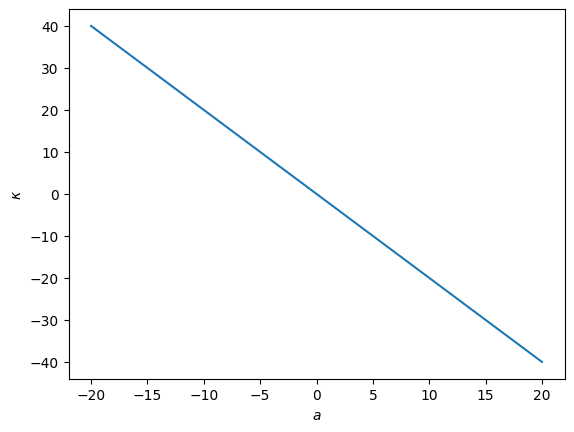

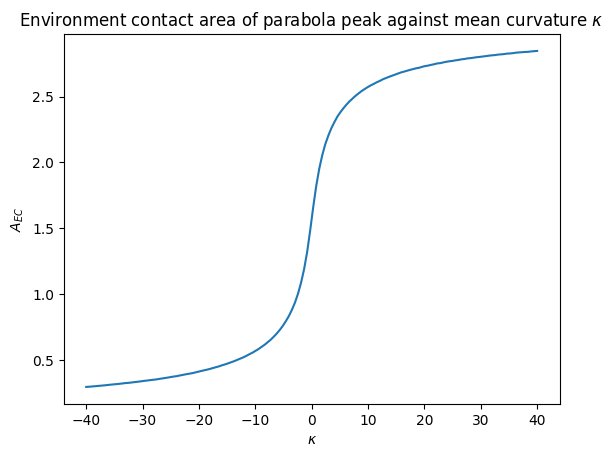

In [172]:
# !ls ../../Figures/results/report\ visualizations

plt.title(r'Environment contact area of parabola peak with varying $a$')
plt.plot(a_values, area_values)
plt.xlabel(r'$a$')
plt.ylabel(r'$A_{EC}$')
plt.savefig('../../Figures/results/report visualizations/environment_contact_vs_a.png', dpi=300)
plt.show()


plt.plot(a_values, curvature_values)
plt.xlabel(r'$a$')
plt.ylabel(r'$\kappa$')
plt.show()


plt.title(r'Environment contact area of parabola peak against mean curvature $\kappa$')
plt.plot(curvature_values, area_values)
plt.ylabel(r'$A_{EC}$')
plt.xlabel(r'$\kappa$')
plt.savefig('../../Figures/results/report visualizations/environment_contact_vs_curvature.png', dpi=300)
plt.show()

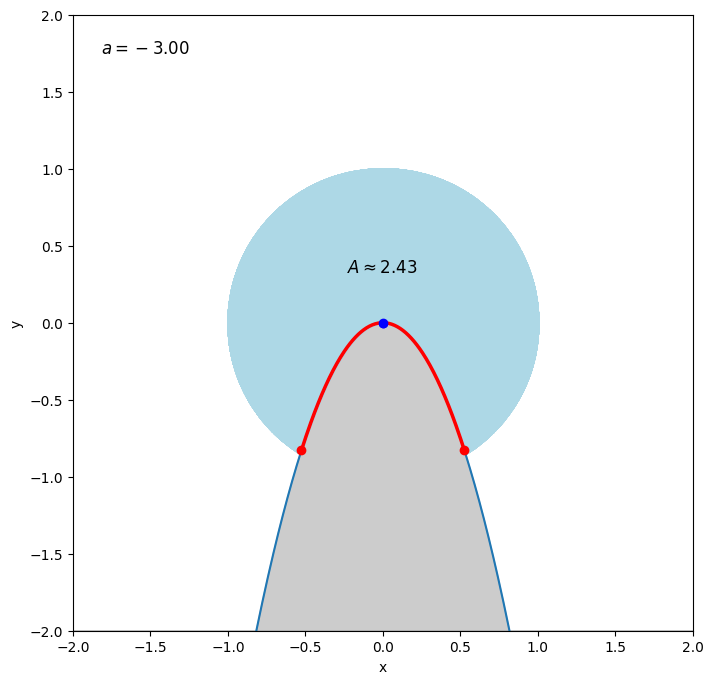

Environment contact area =  2.4306224


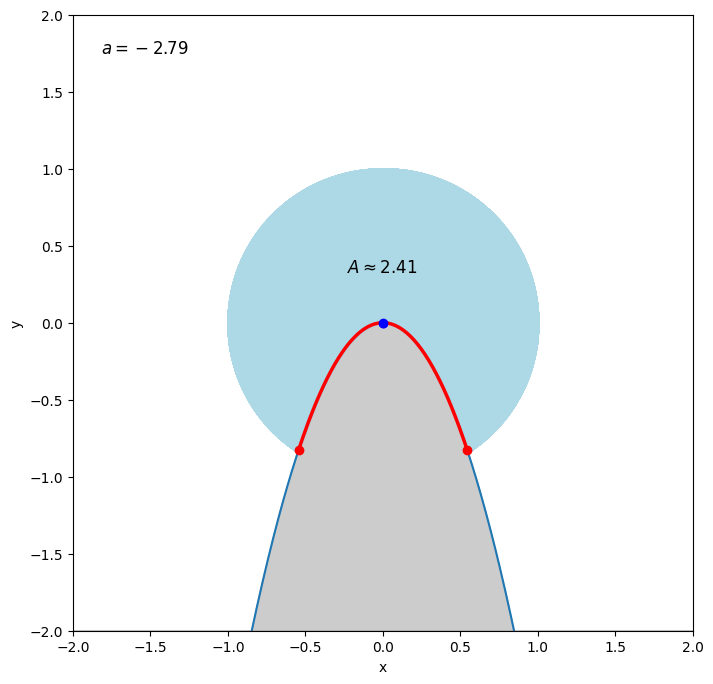

Environment contact area =  2.4094096


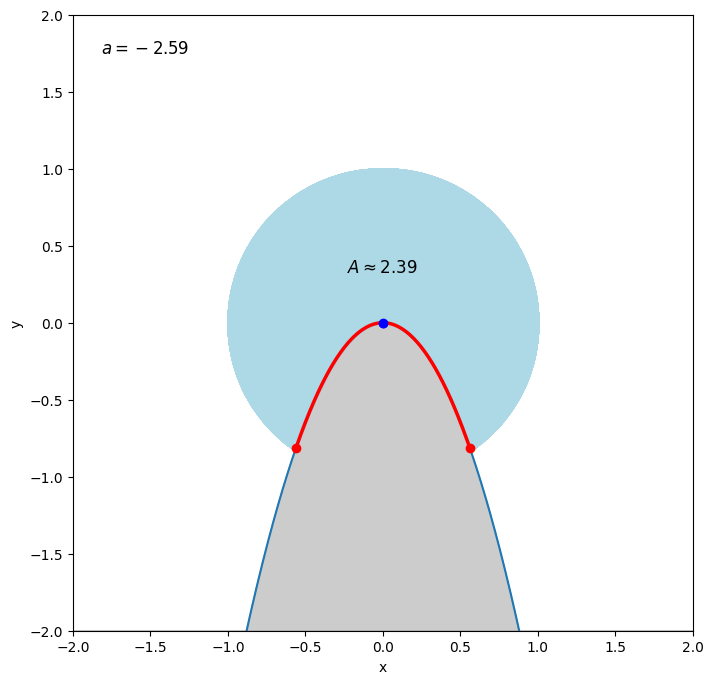

Environment contact area =  2.386194


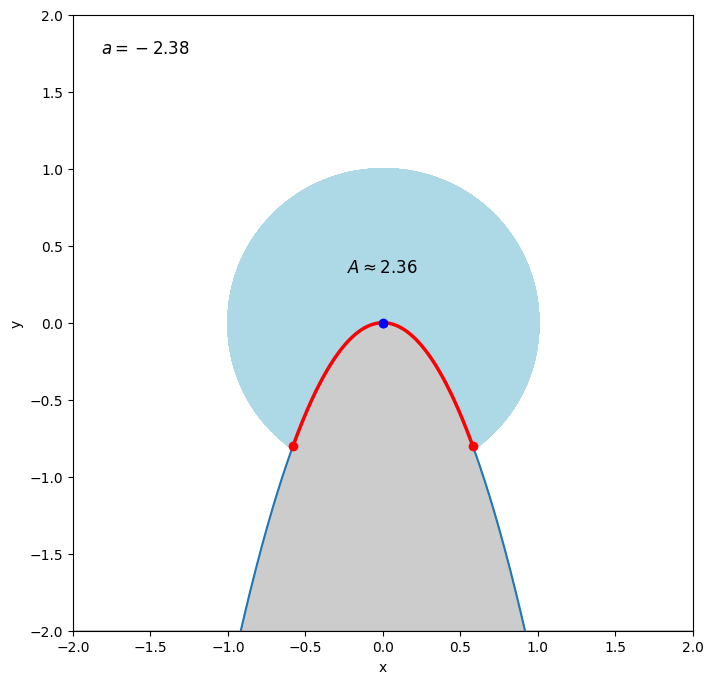

Environment contact area =  2.3601408


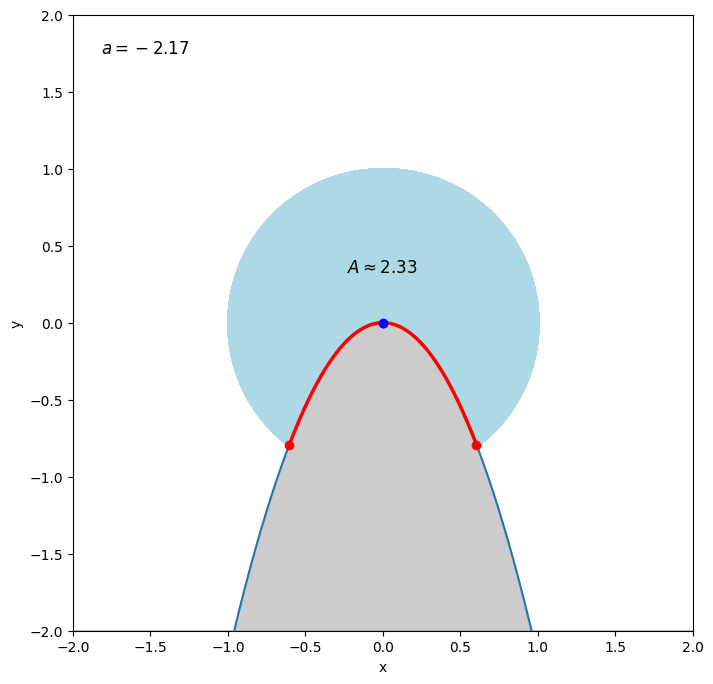

Environment contact area =  2.3311176


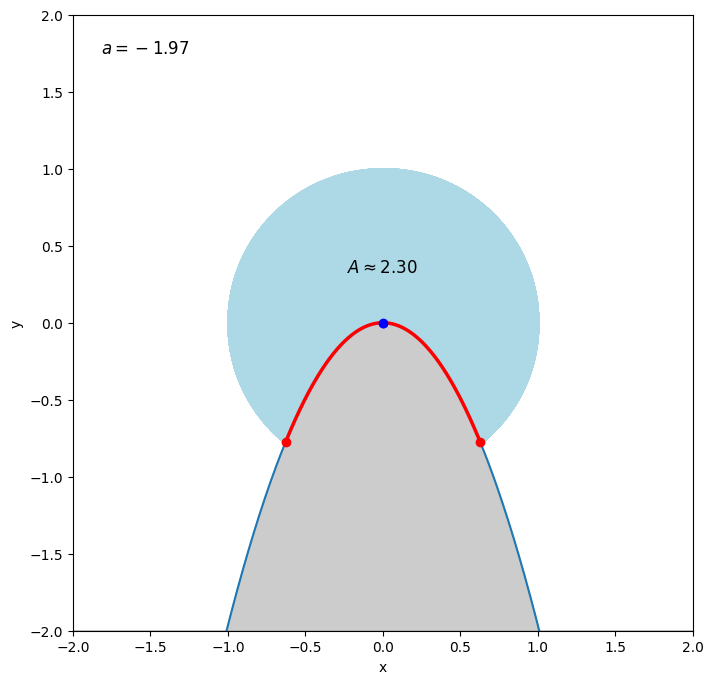

Environment contact area =  2.2981928


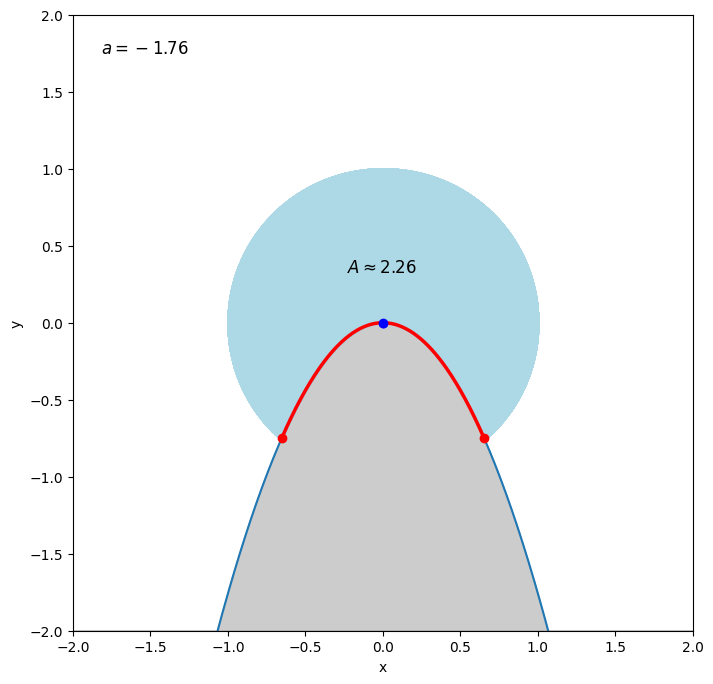

Environment contact area =  2.2621544


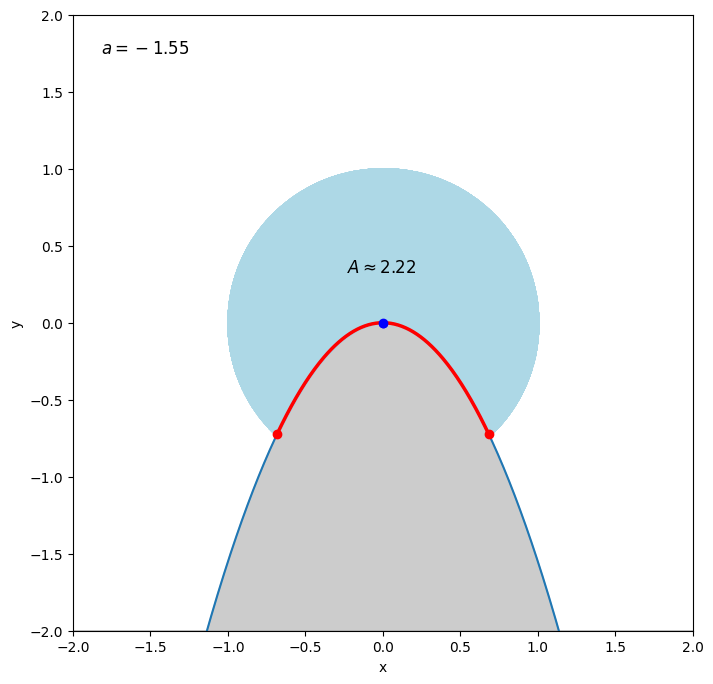

Environment contact area =  2.2199924


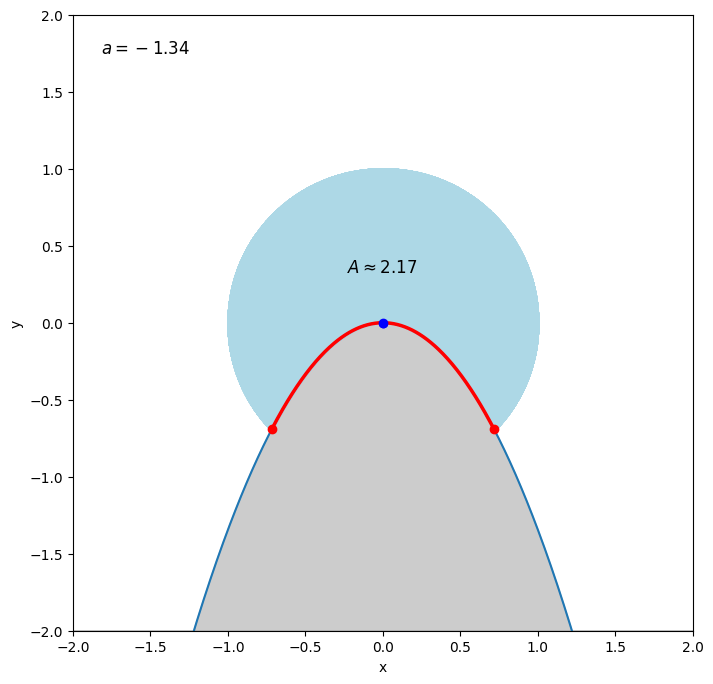

Environment contact area =  2.1731176


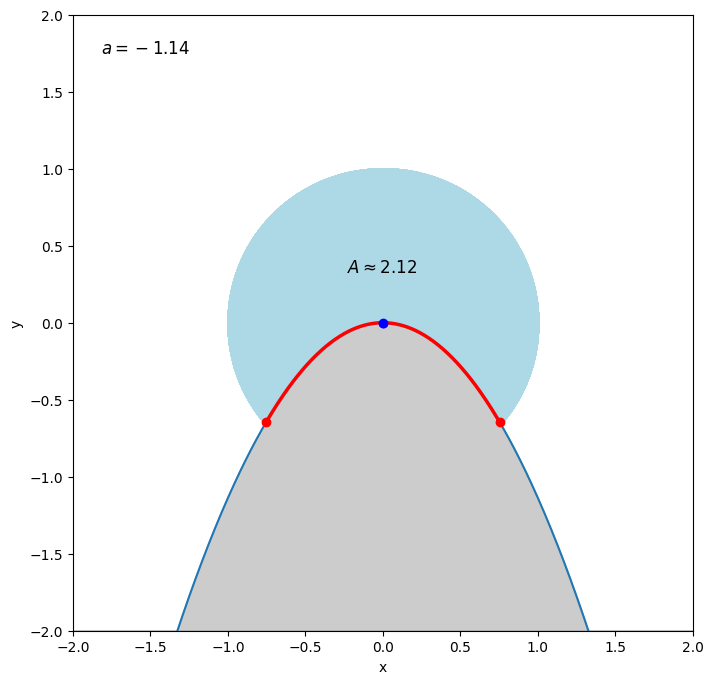

Environment contact area =  2.1171628


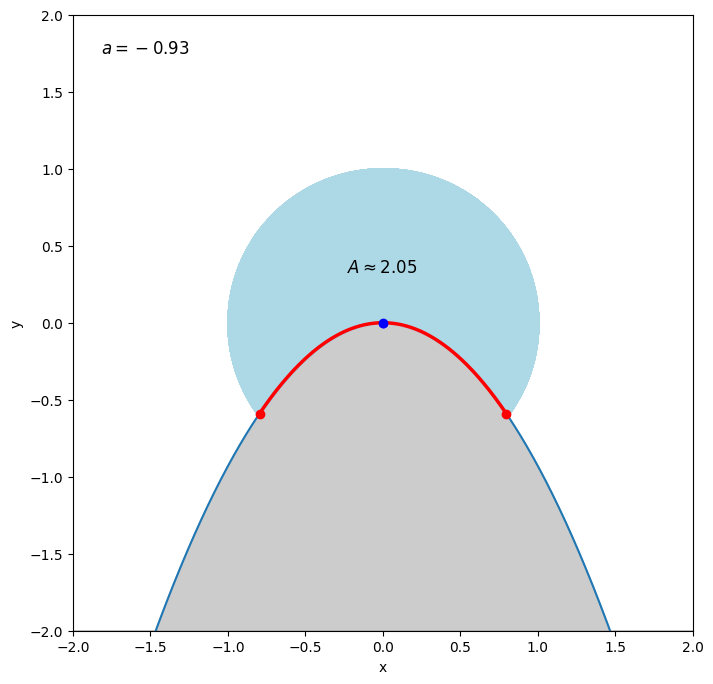

Environment contact area =  2.0522744


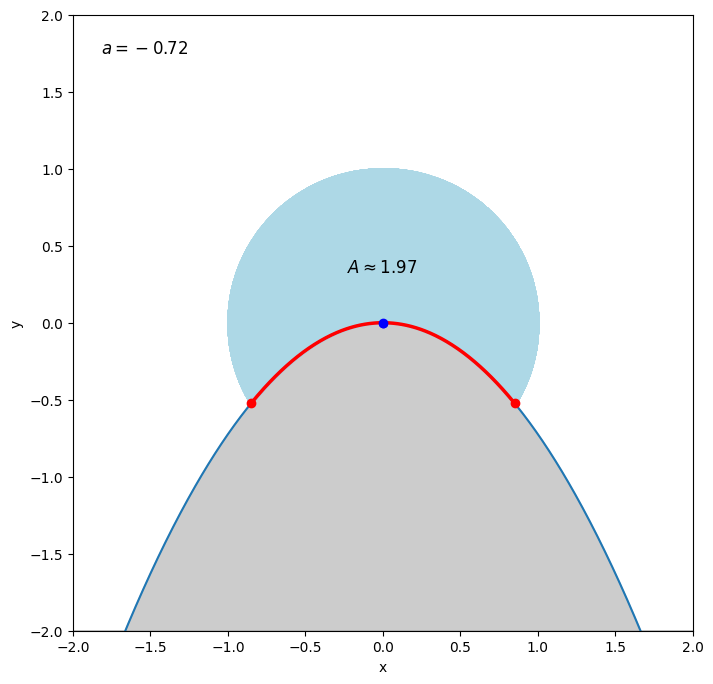

Environment contact area =  1.9739104


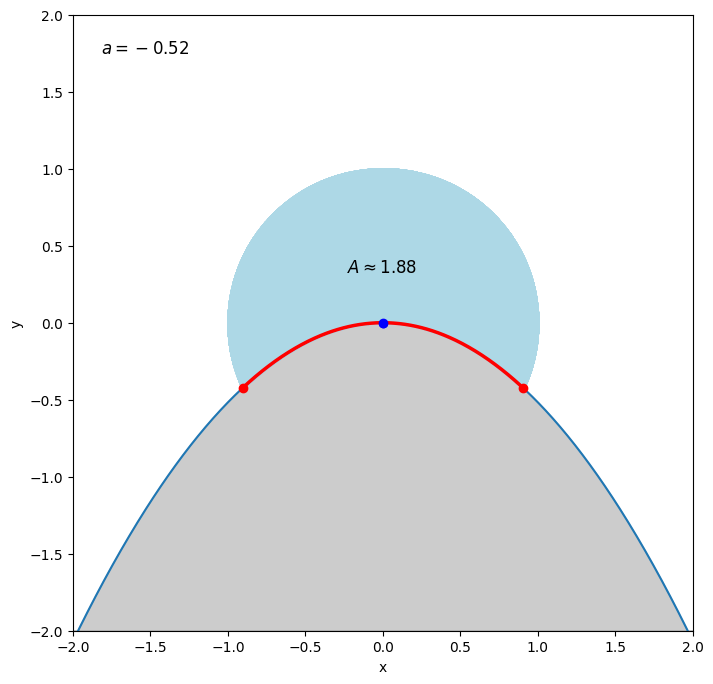

Environment contact area =  1.8814136


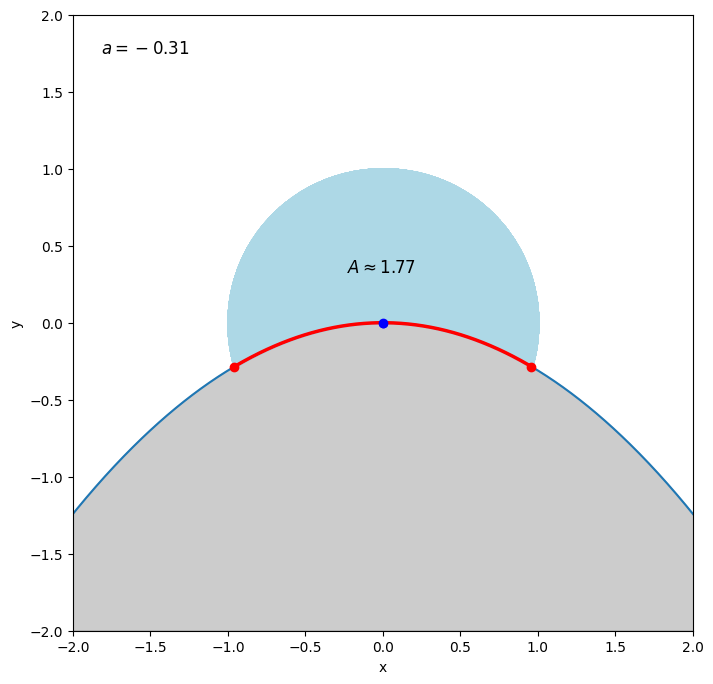

Environment contact area =  1.7693112


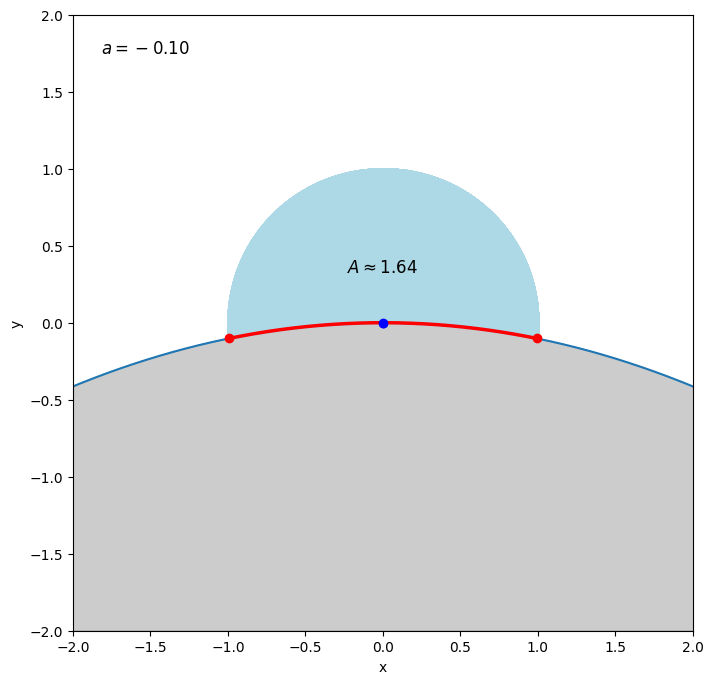

Environment contact area =  1.6394104


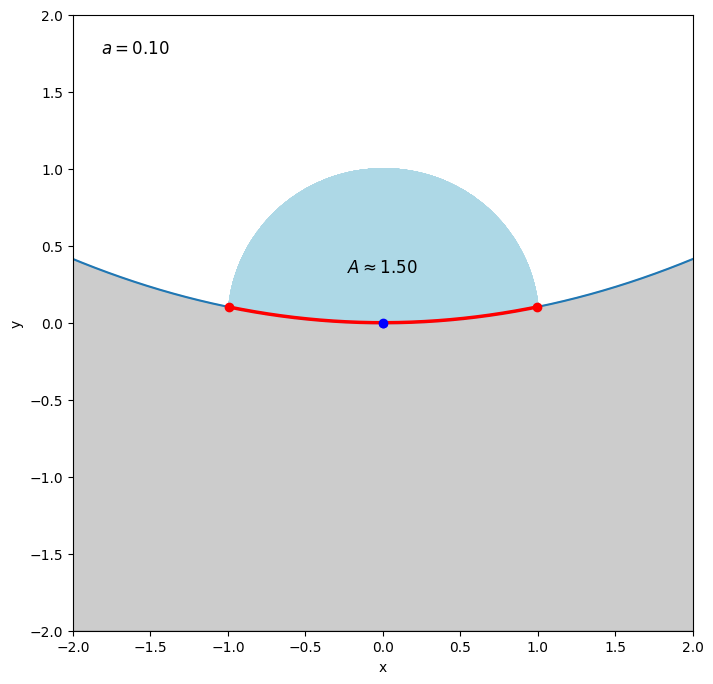

Environment contact area =  1.5032068


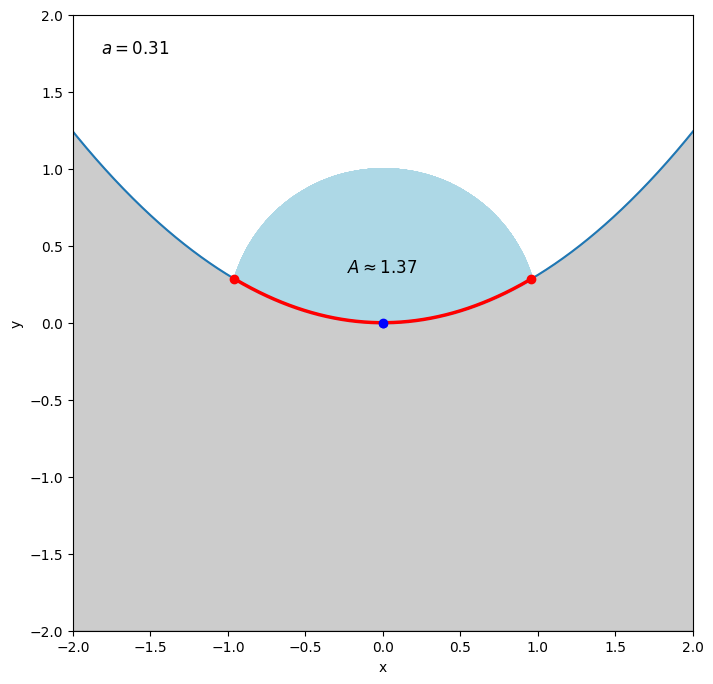

Environment contact area =  1.3719176


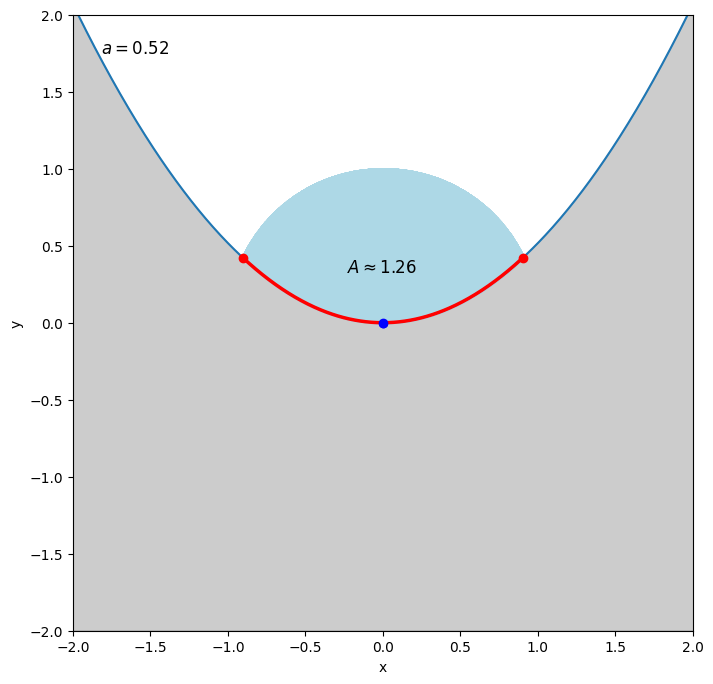

Environment contact area =  1.2619276


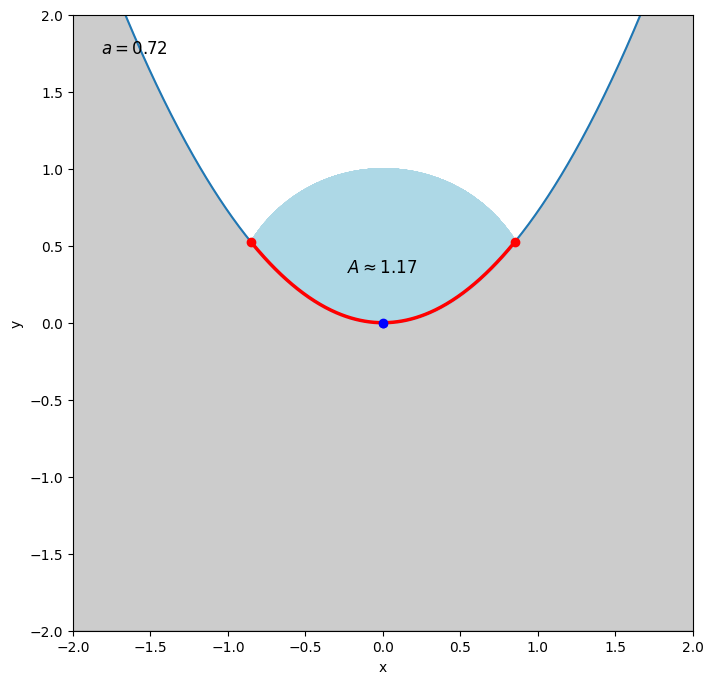

Environment contact area =  1.167612


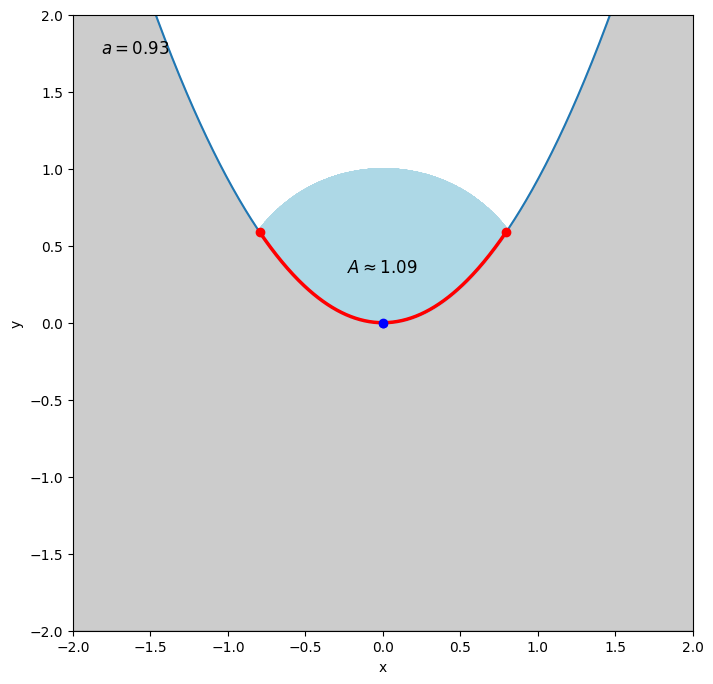

Environment contact area =  1.088862


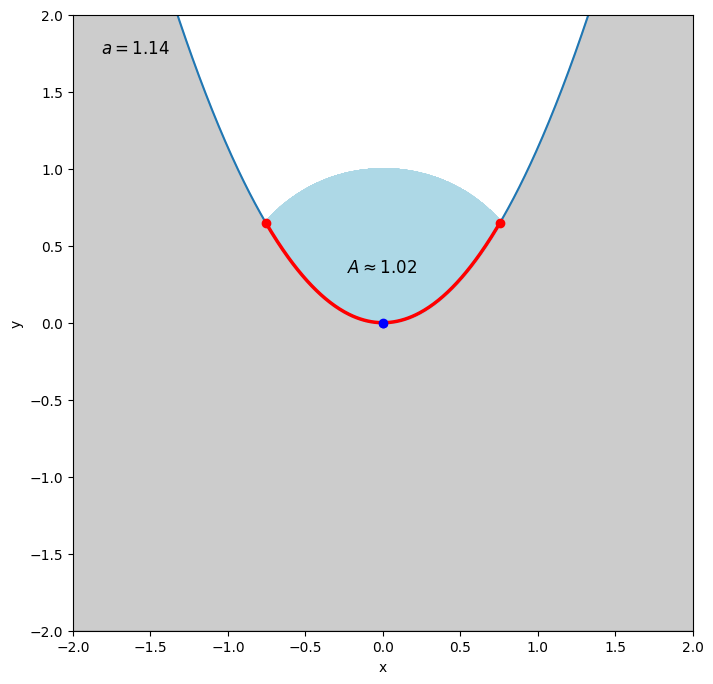

Environment contact area =  1.0244532


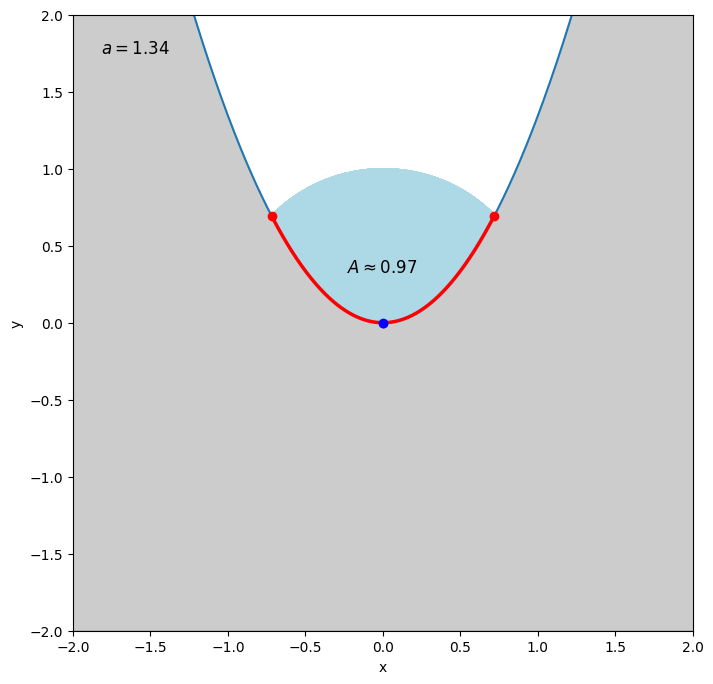

Environment contact area =  0.9684208


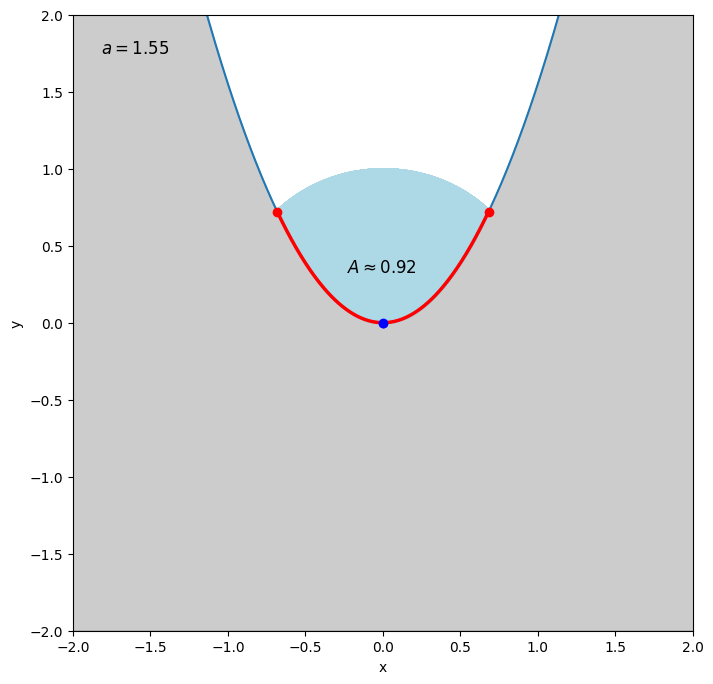

Environment contact area =  0.9212516


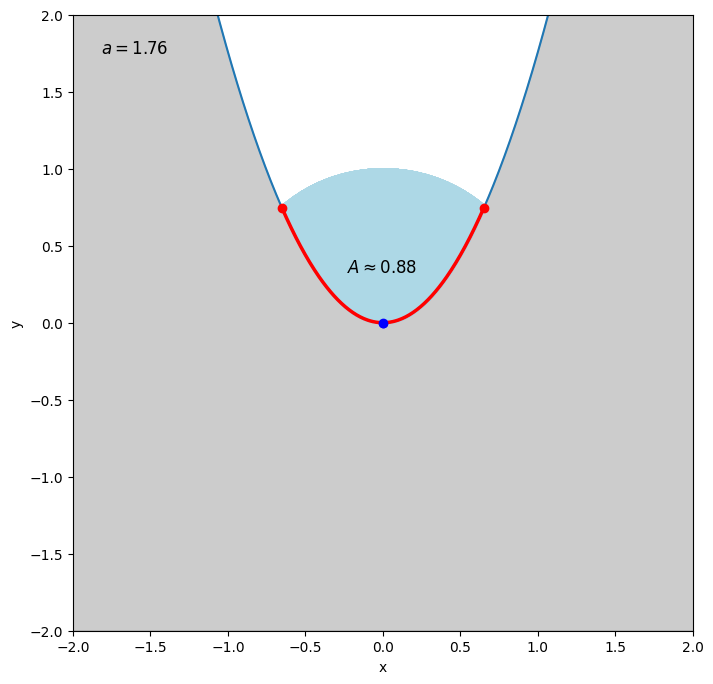

Environment contact area =  0.8799692


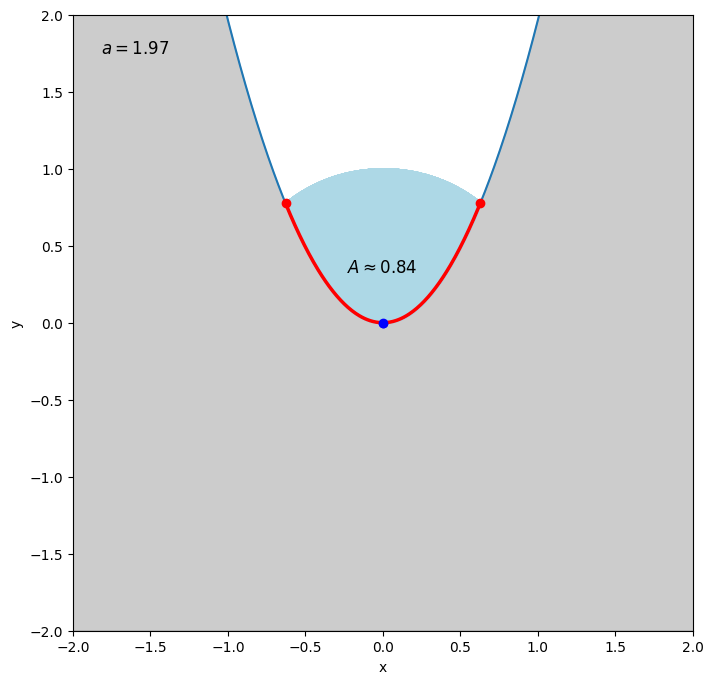

Environment contact area =  0.8436048


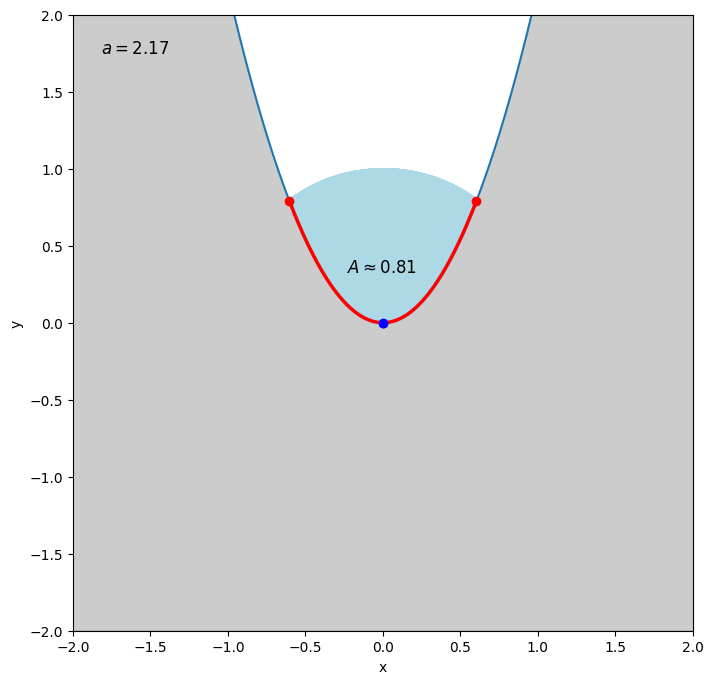

Environment contact area =  0.810568


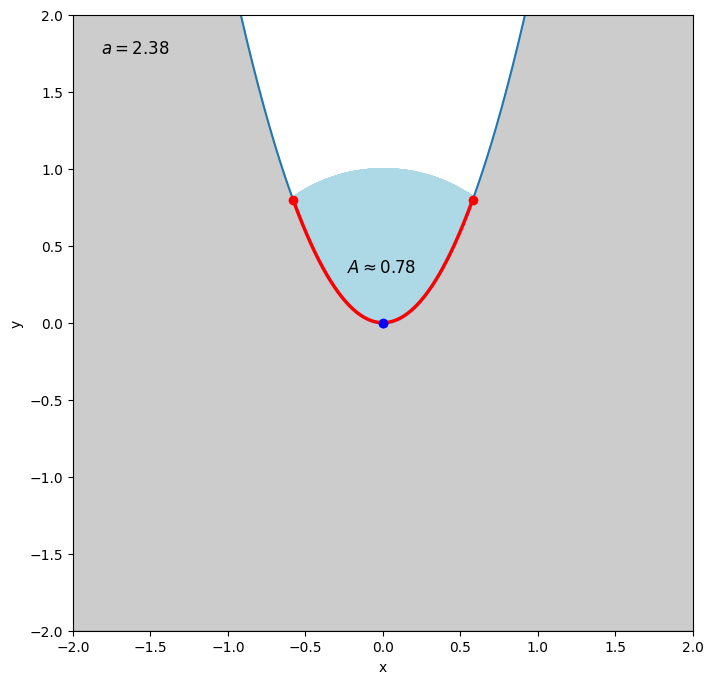

Environment contact area =  0.7825288


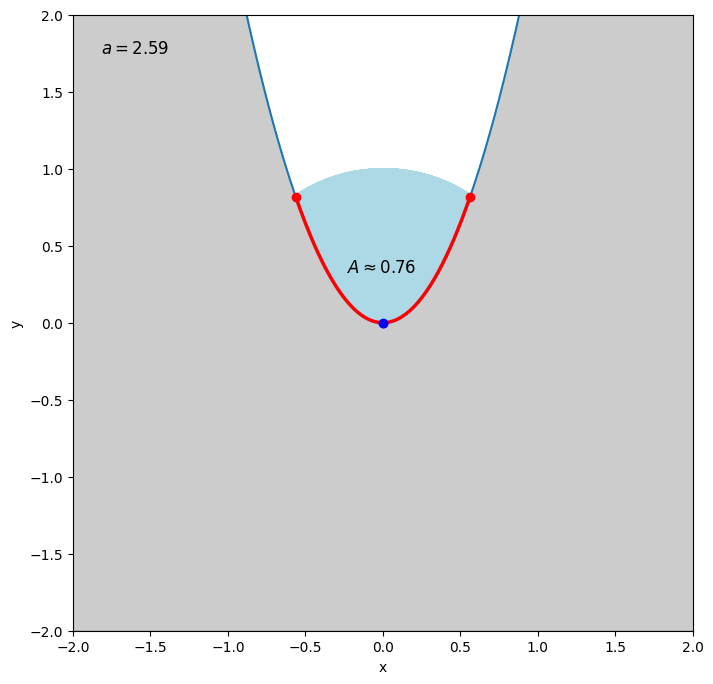

Environment contact area =  0.7553512


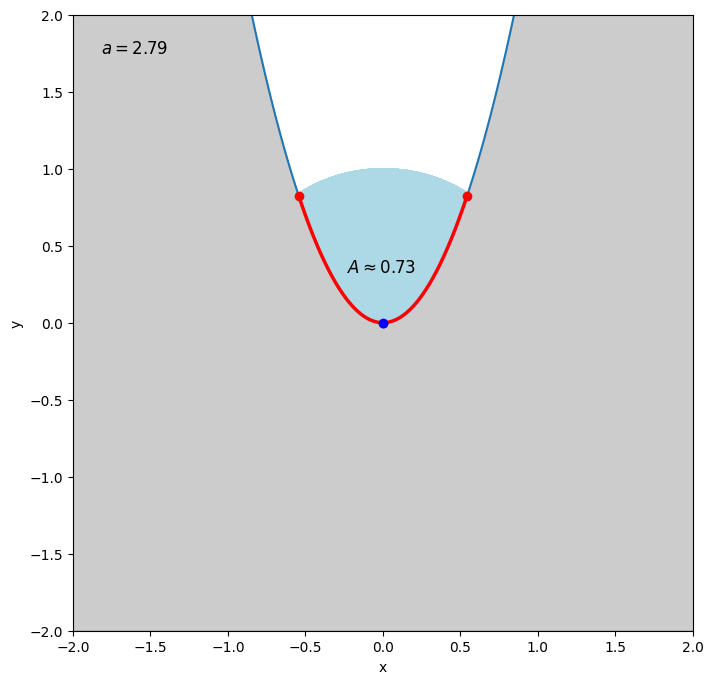

Environment contact area =  0.7316212


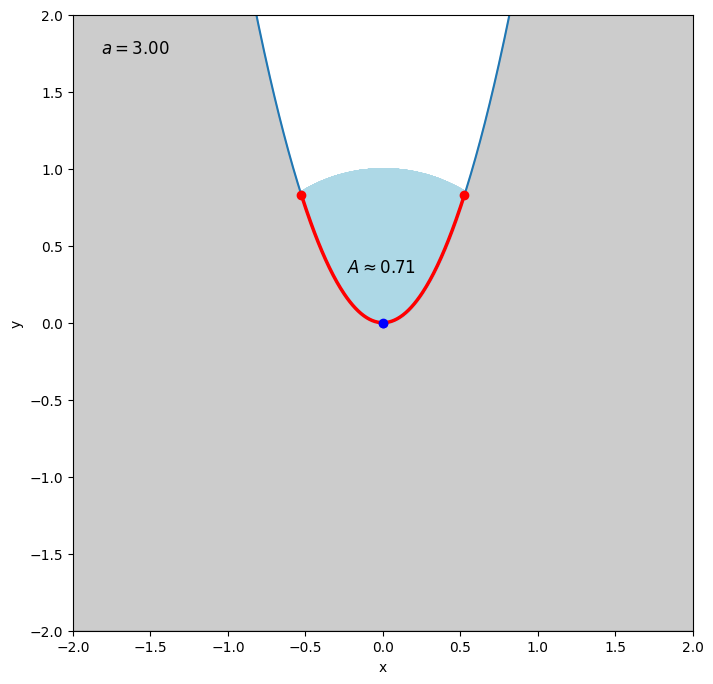

Environment contact area =  0.7098932


In [33]:
def calculate_curvature(a, x):
    
    def func(x):
        y = a*(x**2)
        return y

    def first_derivative(func, x, h=1e-5):
        return (func(x + h) - func(x)) / h

    def second_derivative(func, x, h=1e-5):
        return (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

    def curvature(func, x):
        first_deriv = first_derivative(func, x)
        second_deriv = second_derivative(func, x)

        numerator = abs(second_deriv)
        denominator = (1 + first_deriv**2)**(3/2)

        return numerator / denominator
    
    if a <= 0: 
        curvature_value = curvature(func, x)
    else:
        curvature_value = -curvature(func, x)

    return curvature_value



def calculate_area(a, x, idx, plot=True):

    y = parabola(a,x)

    dist = distance_from_point(x,y)

    circle_points_x = []
    circle_points_y = []

    for i in range(len(x)):
        if dist[i] <= 1:
            circle_points_x.append(x[i])
            circle_points_y.append(y[i])


    x_min = circle_points_x[0]
    x_max =  circle_points_x[-1]
    area, inside_x, inside_y = MonteCarlo(int(1e7), a)

    if plot:
        plt.figure(figsize=(8,8))
        plt.plot(0,0, 'bo', label='Measurement point')
#         if a == 0:
#             plt.title(r'Environment contact area of flat surface, with $y = a = %i$'%(a))
            
#         else:
#             plt.title(r'Environment contact area of the parabola peak of $y = ax^{2}$ with $a = %i$'%(a))
        plt.plot(inside_x, inside_y, 'o', color='lightblue', markersize=0.5)
        plt.plot(0, 0.5, 'o', color='lightblue', label='Environment contact area')
        
        if a == 0:
            plt.plot(x, parabola(a,x), label=r'$y = %i$'%(a))

        else:
            plt.plot(x, parabola(a,x), label=r'$y = %i x^{2}$'%(a))
            
        
        
#         plt.text(-1.8, 1.7, 'Area ≈ %.2f'%(area),
#         bbox={'facecolor': 'lightblue', 'alpha': 0.7, 'pad': 8})

        plt.text(-1.82, 1.75, r'$a = %.2f$'%(a), fontsize=12)

        plt.text(-0.23, 0.33, r'$A \approx %.2f$'%(area), fontsize=12)
        plt.fill_between(x, parabola(a,x), -2, color='grey', alpha=0.4, label='Object')



        
        plt.plot(circle_points_x[0], circle_points_y[0], 'ro', markersize=6)
        plt.plot(circle_points_x[-1], circle_points_y[-1], 'ro', markersize=6)
        plt.plot(circle_points_x, circle_points_y, 'r-', linewidth=2.5, label='Surface contact area')
        # plt.plot(Circle((0, 0), radius=1))
        
        plt.plot(0,0, 'bo')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(-2,2)
        plt.ylim(-2,2)
#         plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize='medium', borderpad=0.1, labelspacing=0.5)


        plt.savefig(f'../../../Project/Code/Make Animation/parabola/parabola_peak_contact_{idx}.png', dpi=300)

        plt.show()
        
        print("Environment contact area = ", area)
        return
            
    return area


x = np.linspace(-3, 3, num=1000)

# calculate_area(-5000, x, True)
# calculate_area(-10, x, True)

a_range = np.linspace(-3,3,30)

for idx, a in enumerate(a_range):
    calculate_area(a, x, idx, True)

# calculate_area(10, x, True)

# calculate_area(2000, x, True)

